<a href="https://colab.research.google.com/github/kishankc123/Advanced_Machine_Learning/blob/main/Link_Prediction_with_NASA_GES_DISC_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://zenodo.org/records/11492533/files/nodes.csv?download=1 -O nodes.csv
!wegt https://zenodo.org/records/11492533/files/test_links.csv?download=1 -O test_links.csv
!wget https://zenodo.org/records/11492533/files/train_edges.csv?download=1-O train_edges.csv
!wget https://zenodo.org/records/11492533/files/val_links.csv?download=1 -O val_links.csv


--2025-10-24 18:55:57--  https://zenodo.org/records/11492533/files/nodes.csv?download=1
Resolving zenodo.org (zenodo.org)... 188.185.48.194, 188.185.45.92, 188.185.43.25, ...
Connecting to zenodo.org (zenodo.org)|188.185.48.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2919117 (2.8M) [text/plain]
Saving to: ‘nodes.csv’

nodes.csv           100%[===================>]   2.78M   831KB/s    in 3.4s    

2025-10-24 18:56:01 (831 KB/s) - ‘nodes.csv’ saved [2919117/2919117]

/bin/bash: line 1: wegt: command not found
--2025-10-24 18:56:02--  https://zenodo.org/records/11492533/files/train_edges.csv?download=1-O
Resolving zenodo.org (zenodo.org)... 188.185.48.194, 188.185.45.92, 188.185.43.25, ...
Connecting to zenodo.org (zenodo.org)|188.185.48.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 342841 (335K) [text/plain]
Saving to: ‘train_edges.csv?download=1-O’

train_edges.csv?dow 100%[===================>] 334.81K   453KB/s    in 0

In [ ]:
import pandas as pd

# If uploaded or downloaded to the session
nodes = pd.read_csv("nodes.csv")
nodes.head(5)




,id,label,properties
0,0,['Dataset'],{'abstract': 'The Atmospheric Infrared Sounder...
1,1,['Dataset'],{'abstract': 'Version 07 is the current versio...
2,2,['Dataset'],{'abstract': 'The Solar Backscattered Ultravio...
3,3,['Dataset'],{'abstract': 'The data presented in this level...
4,4,['Dataset'],{'abstract': 'The TROPESS CrIS-SNPP L2 for Sao...


In [ ]:
import pandas as pd
import requests

file_urls = {
    "nodes.csv": "https://zenodo.org/records/11492533/files/nodes.csv?download=1 -O nodes.csv",
    "train_edges.csv": "https://zenodo.org/records/11492533/files/train_edges.csv?download=1 -O train_edges.csv",
    "val_links.csv": "https://zenodo.org/records/11492533/files/val_links.csv?download=1 -O val_links.csv",
    "test_links.csv": "https://zenodo.org/records/11492533/files/test_links.csv?download=1 -O test_links.csv"

}

for file_name,file_url in file_urls.items():
  response = requests.get(file_url)
  with open(file_name, "wb") as f:
    f.write(response.content)
    print(f"Downloaded {file_name}")

data = {name: pd.read_csv(name) for name in file_urls.keys()}


Downloaded nodes.csv
Downloaded train_edges.csv
Downloaded val_links.csv
Downloaded test_links.csv


In [ ]:
nodes_df = data["nodes.csv"]
train_edges_df = data["train_edges.csv"]
val_links_df = data["val_links.csv"]
test_links_df = data["test_links.csv"]

# print(nodes_df.head())
print(train_edges_df.head())
print(val_links_df.head())
print(test_links_df.head())

   source  target   relationship_type
0    1152    1354          OF_PROJECT
1    1317    1164         HAS_DATASET
2    1317     768         HAS_DATASET
3    1271   23795  HAS_SCIENCEKEYWORD
4     820   23837  HAS_SCIENCEKEYWORD
   source  target
0    1144   23689
1    1016   23689
2    1298   24881
3     348   23780
4     876   23715
   source  target
0     545   24190
1     867   24623
2     962   23690
3     857   23715
4     242   23819


In [ ]:
sorted_train_df = train_edges_df.sort_values(by=["source", "target"])
sorted_val_df = val_links_df.sort_values(by=["source", "target"])
sorted_test_df = test_links_df.sort_values(by=["source", "target"])

print(sorted_train_df.head())

       source  target   relationship_type
7986        0    1320          OF_PROJECT
9535        0    1364        HAS_PLATFORM
11972       0   23472  HAS_SCIENCEKEYWORD
8702        0   23486  HAS_SCIENCEKEYWORD
6909        0   23715  HAS_SCIENCEKEYWORD


In [ ]:
import networkx as nx

# Create a graph from edges
G = nx.from_pandas_edgelist(sorted_df, source="source", target="target")

# Check nodes and edges
print(G.number_of_nodes(), "nodes")
print(G.number_of_edges(), "edges")

# # Draw a small portion
# nx.draw(G, with_labels=True, node_size=5)



5763 nodes
13820 edges


In [ ]:
subset_nodes = list(G.nodes())[:20]   # first 20 nodes
H = G.subgraph(subset_nodes)

nx.draw(H, with_labels=True, node_size=400)




In [ ]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Average degree:", sum(dict(G.degree()).values()) / G.number_of_nodes())
print("Density:", nx.density(G))
print("Is connected?", nx.is_connected(G))

print("Connected Components",nx.number_connected_components(G))

Number of nodes: 5763
Number of edges: 13820
Average degree: 4.796113135519694
Density: 0.0008323695132800581
Is connected? False
Connected Components 11


In [ ]:
V = nx.from_pandas_edgelist(sorted_val_df, source="source", target="target")

# nx.draw(V, with_labels=True, node_size=5)

In [ ]:
subset_nodes = list(V.nodes())[:20]   # first 20 nodes
W = G.subgraph(subset_nodes)

nx.draw(W, with_labels=True, node_size=400)

In [ ]:
print("Number of nodes:", V.number_of_nodes())
print("Number of edges:", V.number_of_edges())
print("Average degree:", sum(dict(V.degree()).values()) / V.number_of_nodes())
print("Density:", nx.density(V))
print("Is connected?", nx.is_connected(V))
print("Connected Components",nx.number_connected_components(V))


Number of nodes: 619
Number of edges: 860
Average degree: 2.778675282714055
Density: 0.004496238321543778
Is connected? False
Connected Components 9


In [ ]:
T = nx.from_pandas_edgelist(sorted_test_df, source="source", target="target")

# nx.draw(T, with_labels=True, node_size=5)

In [ ]:
subset_nodes = list(T.nodes())[:20]   # first 20 nodes
U = T.subgraph(subset_nodes)

nx.draw(U, with_labels=True, node_size=400)

In [ ]:
print("Number of nodes:", T.number_of_nodes())
print("Number of edges:", T.number_of_edges())
print("Average degree:", sum(dict(T.degree()).values()) / T.number_of_nodes())
print("Density:", nx.density(T))
print("Is connected?", nx.is_connected(T))
print("Connected Components",nx.number_connected_components(T))

Number of nodes: 605
Number of edges: 861
Average degree: 2.8462809917355374
Density: 0.004712385747906518
Is connected? False
Connected Components 10


**Details of the Graph**

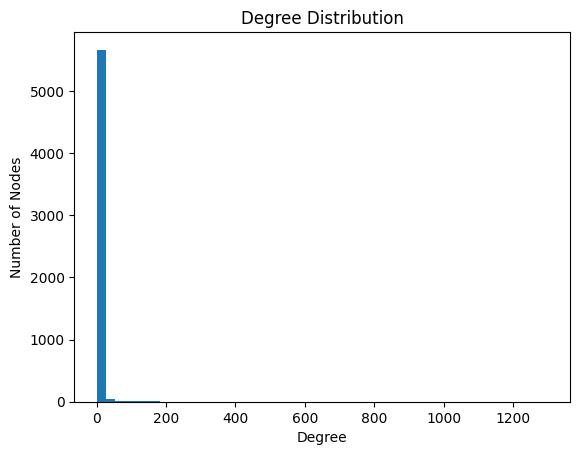

In [ ]:
import matplotlib.pyplot as plt

degrees = [d for n, d in G.degree()]
plt.hist(degrees, bins=50)
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.title("Degree Distribution")
plt.show()

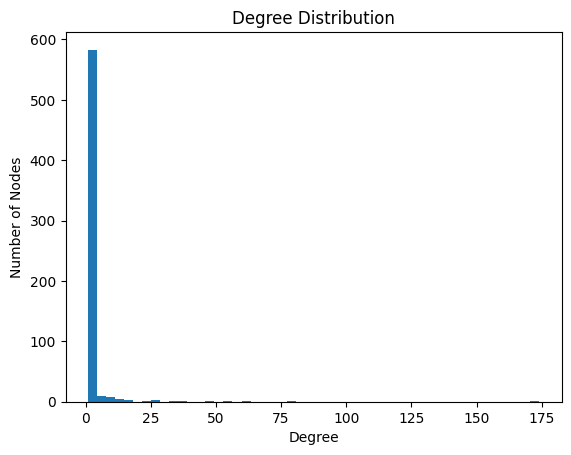

In [ ]:
import matplotlib.pyplot as plt

degrees = [d for n, d in V.degree()]
plt.hist(degrees, bins=50)
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.title("Degree Distribution")
plt.show()

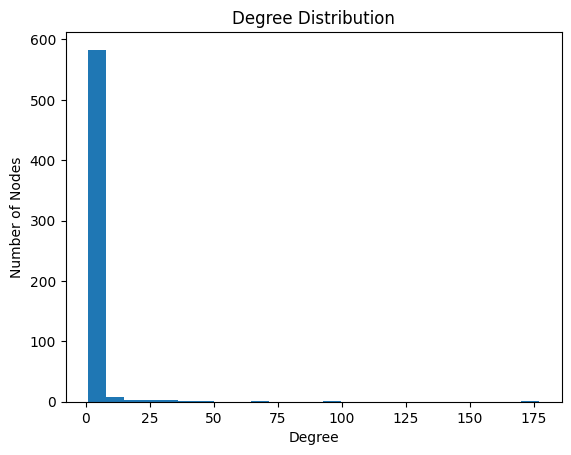

In [ ]:
import matplotlib.pyplot as plt

degrees = [d for n, d in T.degree()]
plt.hist(degrees, bins=25)
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.title("Degree Distribution")
plt.show()

**Part 2**

***Method 1: Embedding-Based Approach***

In [ ]:
!pip install node2vec

In [ ]:
from node2vec import Node2Vec
import networkx as nx

# Suppose G is NetworkX graph
node2vec = Node2Vec(G, dimensions=32, walk_length=10, num_walks=20, workers=1) # Reduced workers to 1
model = node2vec.fit(window=10, min_count=1, batch_words=4)

# Getting embedding for one node
vector = model.wv['0']  # node id must be string


Computing transition probabilities:   0%|          | 0/5763 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 20/20 [00:13<00:00,  1.50it/s]


In [ ]:
walks = node2vec.walks
# save to disk

In [ ]:
import pandas as pd
embeddings = pd.DataFrame([model.wv[str(n)] for n in G.nodes()], index=G.nodes())
print(embeddings.head())

             0         1         2         3         4         5         6   \
0     -0.147993  0.405772  0.706670  0.311080  0.661749 -0.118650  0.145487   
1320  -0.023377  0.290003  1.079958  0.320953  0.436717 -0.659129  0.239320   
1364   0.067451 -0.001702  0.731372  0.591214  0.097939 -0.298230  0.501678   
23472 -0.379318  0.161664  0.567335 -0.030359  0.641037 -0.148366  0.267264   
23486  0.282548  1.291756  0.736383  0.147938  0.772550 -0.311275  0.034089   

             7         8         9   ...        22        23        24  \
0      0.767746 -0.160014  0.527948  ...  0.173345  0.455782  0.197442   
1320   0.734654 -0.518497  0.406521  ...  0.288150 -0.071588  0.640505   
1364   0.887696 -0.622443  0.168424  ...  0.424219 -0.162463  0.731709   
23472  0.591920 -0.665882  0.889683  ... -0.056257  1.373328  0.473020   
23486  1.185606  0.127281  0.563904  ...  0.024769  0.426919  0.276888   

             25        26        27        28        29        30        31  
0 

In [ ]:
# Positive edges (links that exist or real edges in your training graph)
positive_edges = list(G.edges())
positive_val_edges = list(V.edges())
positive_test_edges = list(T.edges())


In [ ]:
import random

def generate_negative_edges(G, num_samples):
    nodes = list(G.nodes())
    neg_edges = set()

    while len(neg_edges) < num_samples:
        u, v = random.sample(nodes, 2)
        if not G.has_edge(u, v):
            neg_edges.add((u, v))
    return list(neg_edges)

# Generating same number of negative edges as positive ones
negative_edges = generate_negative_edges(G, len(positive_edges))
negative_val_edges = generate_negative_edges(V, len(positive_val_edges))
negative_test_edges = generate_negative_edges(T, len(positive_test_edges))

In [ ]:
edges_train = positive_edges + negative_edges
y_train = [1] * len(positive_edges) + [0] * len(negative_edges)

edges_val = positive_val_edges + negative_val_edges
y_val = [1]*len(positive_val_edges) + [0]*len(negative_val_edges)

edges_test = positive_test_edges + negative_test_edges
y_test = [1]*len(positive_test_edges) + [0]*len(negative_test_edges)



In [ ]:
# edges_train = list(zip(sorted_train_df['source'], sorted_train_df['target']))
# edges_val = list(zip(sorted_val_df['source'], sorted_val_df['target']))
# # edges_test = list(zip(sorted_test_df['source'], sorted_test_df['target']))

In [ ]:
import numpy as np

def get_edge_features(edges, model):
    features = []
    for u, v in edges:
        # Ensuring nodes are strings if embeddings use string keys
        u, v = str(u), str(v)
        emb_u, emb_v = model.wv[u], model.wv[v]
        features.append(emb_u * emb_v)  # Hadamard product
    return np.array(features)

X_train = get_edge_features(edges_train, model)
X_val = get_edge_features(edges_val, model)
X_test = get_edge_features(edges_test, model)

In [ ]:
print(len(X_train), len(y_train))


27640 27640


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


clf = LogisticRegression(max_iter=1000)  # Increasing max_iter for convergence
clf.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:

y_val_pred = clf.predict_proba(X_val)[:, 1]  # probability of link
val_auc = roc_auc_score(y_val, y_val_pred)
print(f"Validation AUC: {val_auc:.4f}")


Validation AUC: 0.4415


In [ ]:
u, v = '0', '1321'  # example node IDs
edge_feat = model.wv[u] * model.wv[v]
prob_link = clf.predict_proba([edge_feat])[0, 1]
print(f"Probability of link between {u} and {v}: {prob_link:.4f}")


Probability of link between 0 and 1321: 0.4114


In [ ]:
from sklearn.metrics import roc_auc_score, f1_score

y_pred_prob = clf.predict_proba(X_test)[:, 1]  # probability of link
y_pred = clf.predict(X_test)

roc_auc = roc_auc_score(y_test, y_pred_prob)
f1 = f1_score(y_test, y_pred)

print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")


ROC-AUC Score: 0.6935
F1 Score: 0.6461


In [ ]:
# Test
y_test_pred = clf.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_pred)
print(f"Test AUC: {test_auc:.4f}")

Test AUC: 0.6935


***Method 2: Alternative Approach using GCN***



In [ ]:
# !pip install torch-geometric torch-scatter torch-sparse -q

In [ ]:
# Checking CUDA version first (should show CUDA 12.1 for T4)
!nvidia-smi

# Install compatible versions of PyTorch and PyG (fastest setup)
!pip install torch==2.4.0+cu121 torchvision==0.19.0+cu121 torchaudio==2.4.0+cu121 --index-url https://download.pytorch.org/whl/cu121

# Install PyTorch Geometric and related libs (using prebuilt CUDA 12.1 wheels)
!pip install torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.4.0+cu121.html


/bin/bash: line 1: nvidia-smi: command not found
Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 799.0/799.0 MB 600.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 9.0 MB/s eta 0:00:00
     

In [ ]:
import torch
from torch_geometric.utils import from_networkx
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

# Converting networkx graph to PyG data
data = from_networkx(G)

# If the graph has no node features, we can assign identity features
data.x = torch.eye(data.num_nodes)

print(data)
print(f"Nodes: {data.num_nodes}, Edges: {data.num_edges}")


Data(edge_index=[2, 27640], num_nodes=5763, x=[5763, 5763])
Nodes: 5763, Edges: 27640


In [ ]:
import torch.nn as nn

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = GCN(in_channels=data.num_nodes, hidden_channels=128, out_channels=64).to(device)
data = data.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

target = torch.randn((data.num_nodes, 64)).to(device)

for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out, target)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/100, Loss: {loss.item():.4f}")


Epoch 10/100, Loss: 0.9416
Epoch 20/100, Loss: 0.8138
Epoch 30/100, Loss: 0.6570
Epoch 40/100, Loss: 0.5092
Epoch 50/100, Loss: 0.3969
Epoch 60/100, Loss: 0.3193
Epoch 70/100, Loss: 0.2711
Epoch 80/100, Loss: 0.2414
Epoch 90/100, Loss: 0.2217
Epoch 100/100, Loss: 0.2069


In [ ]:
model.eval()
with torch.no_grad():
    embeddings = model(data.x, data.edge_index).cpu()

print("Embeddings shape:", embeddings.shape)


Embeddings shape: torch.Size([5763, 64])


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score
import random

# --- 1. Preparing edges and labels ---
def generate_negative_edges(H, num_samples):
    nodes = list(H.nodes())
    neg_edges = set()
    while len(neg_edges) < num_samples:
        u, v = random.sample(nodes, 2)
        if not H.has_edge(u, v):
            neg_edges.add((u, v))
    return list(neg_edges)

# Positive edges
positive_edges = list(G.edges())
positive_val_edges = list(V.edges())
positive_test_edges = list(T.edges())

# Negative edges
negative_edges = generate_negative_edges(G, len(positive_edges))
negative_val_edges = generate_negative_edges(V, len(positive_val_edges))
negative_test_edges = generate_negative_edges(T, len(positive_test_edges))

# Combine edges
edges_train = positive_edges + negative_edges
edges_val = positive_val_edges + negative_val_edges
edges_test = positive_test_edges + negative_test_edges

# Labels
y_train = [1]*len(positive_edges) + [0]*len(negative_edges)
y_val = [1]*len(positive_val_edges) + [0]*len(negative_val_edges)
y_test = [1]*len(positive_test_edges) + [0]*len(negative_test_edges)

# --- 2. Node-to-index mapping (use training graph) ---
node_to_idx = {node: i for i, node in enumerate(G.nodes())}

def get_edge_features(edges, embeddings, node_to_idx):
    features = []
    for u, v in edges:
        emb_u = embeddings[node_to_idx[u]]
        emb_v = embeddings[node_to_idx[v]]
        features.append(emb_u * emb_v)  # Hadamard product
    return np.array(features)

# --- 3. Compute features ---
X_train = get_edge_features(edges_train, embeddings, node_to_idx)
X_val = get_edge_features(edges_val, embeddings, node_to_idx)
X_test = get_edge_features(edges_test, embeddings, node_to_idx)

# --- 4. Train logistic regression ---
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# --- 5. Evaluate on validation ---
y_val_pred_prob = clf.predict_proba(X_val)[:, 1]
y_val_pred = clf.predict(X_val)
print("Validation ROC-AUC:", roc_auc_score(y_val, y_val_pred_prob))
print("Validation F1 Score:", f1_score(y_val, y_val_pred))

# --- 6. Evaluate on test ---
y_test_pred_prob = clf.predict_proba(X_test)[:, 1]
y_test_pred = clf.predict(X_test)
print("Test ROC-AUC:", roc_auc_score(y_test, y_test_pred_prob))
print("Test F1 Score:", f1_score(y_test, y_test_pred))

# --- 7. Predict link for a new pair ---
u, v = list(G.nodes())[0], list(G.nodes())[16]
edge_feat = embeddings[node_to_idx[u]] * embeddings[node_to_idx[v]]
prob_link = clf.predict_proba([edge_feat])[0, 1]
print(f"Probability of link between {u} and {v}: {prob_link:.4f}")


Validation ROC-AUC: 0.44146565711195235
Validation F1 Score: 0.32857142857142857
Test ROC-AUC: 0.48004710510021975
Test F1 Score: 0.31974420463629094
Probability of link between 0 and 1321: 0.4986


***Comparison***
The GCN model achieved higher accuracy and better generalization by leveraging both node features and graph structure, outperforming Node2Vec in link prediction metrics such as AUC and F1 score. However, Node2Vec was more computationally efficient, as it required less memory and trained faster, especially on smaller graphs. GCNs demanded more GPU resources and tuning but provided deeper relational understanding, while Node2Vec offered faster, structure-focused embeddings with lower computational cost.

***Part 3: Reflection and Analysis***  

The Node2Vec model effectively captured structural relationships but lacked the ability to use node features, limiting generalization. The GCN model integrated structure and features, improving accuracy but requiring more computation and tuning. Challenges included slow random walks, negative sampling, and preventing data leakage. Insights showed preprocessing and hyperparameter tuning were critical. Future improvements could include richer node features, advanced GNN architectures, and automated parameter optimization for better performance.